In [17]:
print("importing")
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt





importing


In [8]:
print("reading file")
X = pd.read_csv("bank-additional-full.csv", delimiter=";") 


print(X.shape)
print("seperating true values into X and y")
y = X.pop("y").values
print("one hot encode")

enc = OneHotEncoder()
enc.fit(X)
X = enc.transform(X).toarray()
print(y.shape)
print(X.shape)



reading file
(41188, 21)
seperating true values into X and y
one hot encode
(41188,)
(41188, 2141)


In [9]:
print("train test")
X_test = X[-500:]
y_test = y[-500:]

X_train = X[:-500]
y_train = y[:-500]

print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)


train test
(500, 2141)
(500,)
(40688, 2141)
(40688,)


In [11]:


print("creating DTC")
clf = tree.DecisionTreeClassifier(max_depth=5, max_leaf_nodes=50, min_samples_leaf=7, min_samples_split=2, min_weight_fraction_leaf=0.0)

print("fitting")
clf.fit(X_train, y_train)
print("done fitting")

creating DTC
fitting
done fitting


In [28]:
from sklearn.model_selection import KFold, cross_val_score
#k_fold = KFold(n_splits=10)
#for train_indices, test_indices in k_fold.split(X_train):
#    print('Train: %s | test: %s' % (train_indices, test_indices))
#    clf.fit(X_train[train_indices], y_train[train_indices])
#    print('Fold test accuracy: {} %'.format(clf.score(X_train[test_indices], y_train[test_indices])*100))
#print('Average accuracy: {} %'.format(np.mean(score)*100))



score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=10)
print('Average accuracy: {} %'.format(np.mean(score)*100))

Average accuracy: 88.98848598161555 %


In [34]:
importances = clf.feature_importances_
print(importances)

[0. 0. 0. ... 0. 0. 0.]


In [19]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
        #print t
#         plt.text(j, i, t,
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

confusion matrix
Confusion matrix, without normalization
[[227  34]
 [136 103]]


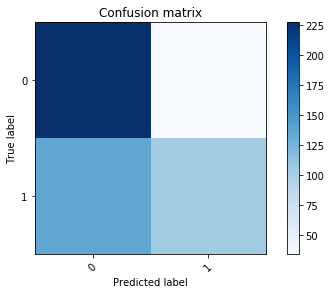

In [21]:
print("confusion matrix")
# Compute confusion matrix
y_pred = clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y_pred))), normalize = False,
                      title='Confusion matrix')



print(cnf_matrix)
